In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import joblib
from imblearn.over_sampling import RandomOverSampler
import imblearn

In [2]:
# read the test train and sample data
train = pd.read_csv('../Data/train.csv')
test  = pd.read_csv('../Data/test.csv')
sub = pd.read_csv('../Data/sample.csv')

In [3]:
# total no.of rows and columns
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [4]:
# to view the dataypes
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [5]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
# to view the first two rows
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [7]:
#EDA
# checking missing data
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# to check duplicates
train.duplicated().sum()

0

In [9]:
tgt_col = ['Response']
ign_cols = ['id']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [10]:
print(tgt_col,ign_cols, cat_cols,num_cols, sep='\n')

['Response']
['id']
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [11]:
train[cat_cols].head(2)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No


In [12]:
num_cols= train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
train[num_cols].head(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183


<Axes: xlabel='Response'>

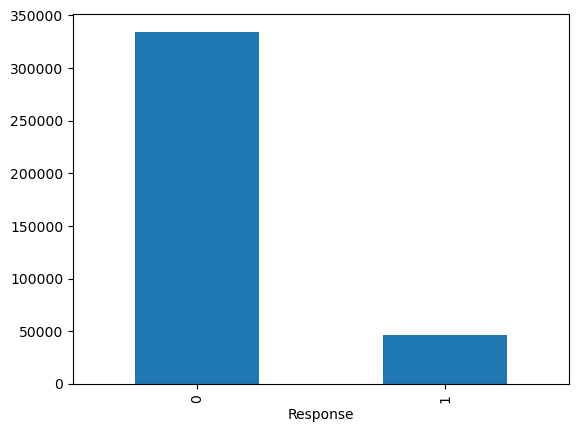

In [13]:
train['Response'].value_counts().plot(kind='bar')

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [15]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

<Axes: xlabel='Vintage', ylabel='Density'>

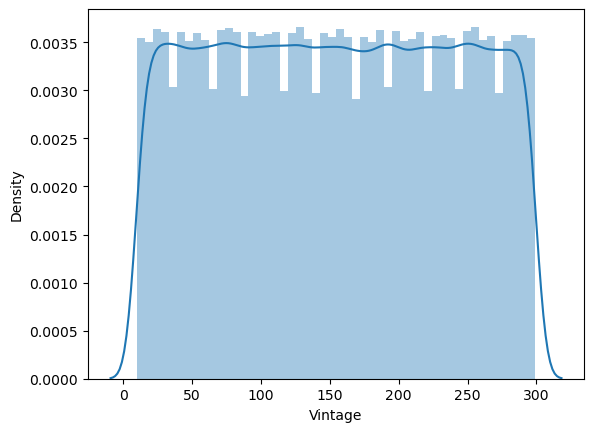

In [16]:
sns.distplot(train['Vintage'])

<Axes: xlabel='Age', ylabel='Density'>

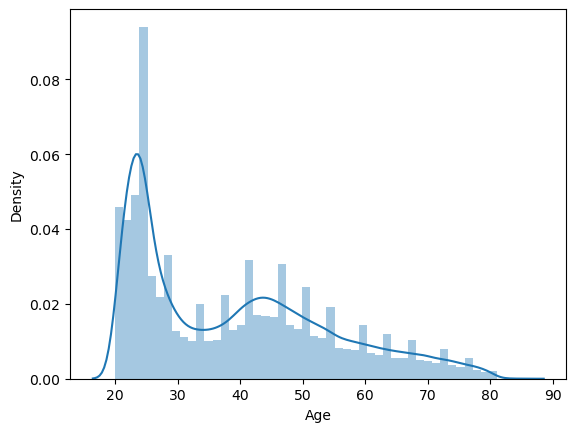

In [17]:
sns.distplot(train['Age'])

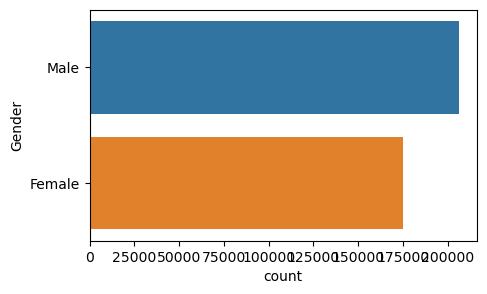

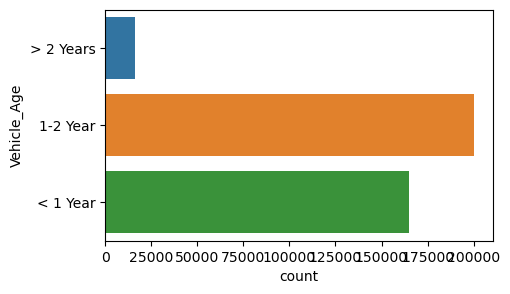

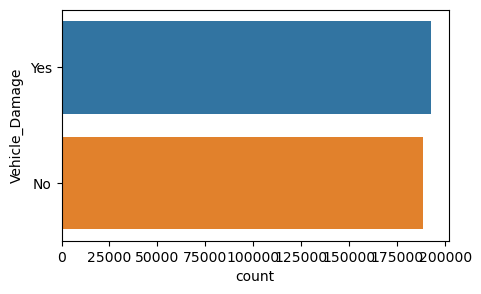

In [18]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

Text(0.5, 1.0, 'Gender : Female')

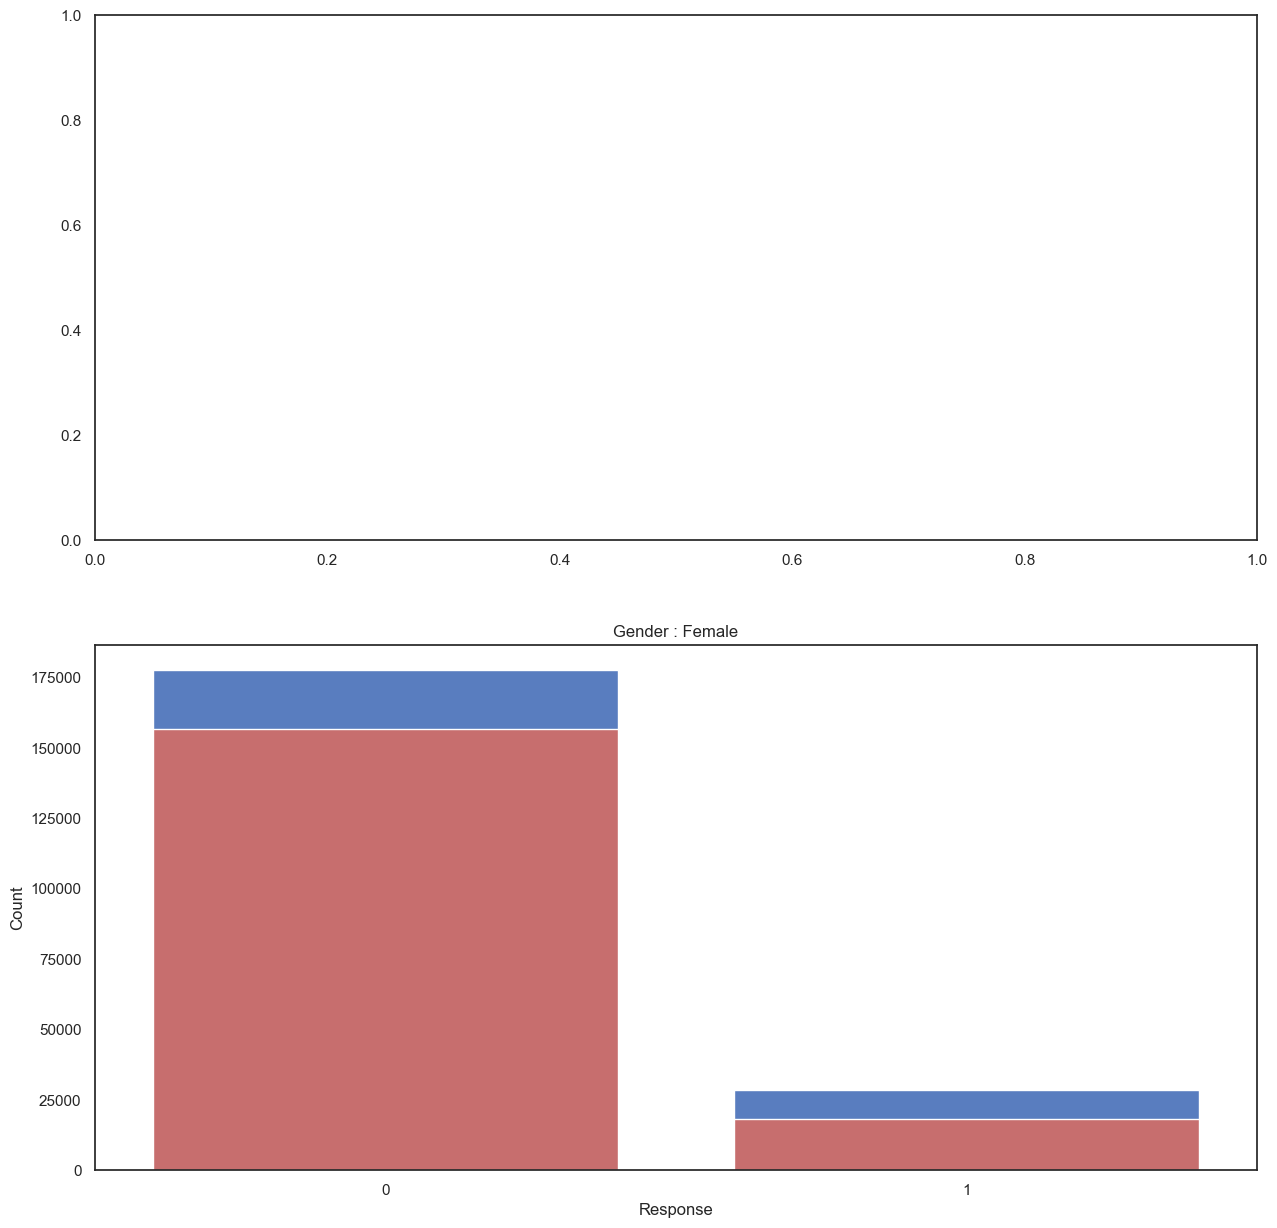

In [19]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(2, 1, figsize=(15, 15))

male = train[train['Gender'] =='Male']["Response"].value_counts().rename('Count')

female = train[train['Gender'] =='Female']["Response"].value_counts().rename('Count')

sns.barplot(x=male.index,y=male,color="b").set_title('Gender : Male')
sns.barplot(x=female.index,y=female,color="r").set_title('Gender : Female')

In [20]:
#create pipeline to do preprocessing of category columns
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat',SimpleImputer(strategy='most_frequent')), #missing values
        ('ohe',OneHotEncoder(handle_unknown='ignore')) # Category encoding
    ]
)
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num',SimpleImputer(strategy='median')), #missing values
        ('scale',StandardScaler()) # std scaler
    ]
)

In [21]:
# create map b/w the pipeline and the columns
preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode, cat_cols), # Cat cols
        ('num_encode',num_pipe_encode, num_cols) #numerical cols
    ]
)
# create object for the LogisticRegression
mymodel = LogisticRegression()

In [22]:
# merging the preprocessing  and modelling in a pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessinng
        ('model',mymodel) #modeling
    ]
)

In [23]:
X = train.drop(columns = ign_cols+ tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183


In [24]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


In [25]:
train_X, val_X, train_y,val_y = train_test_split(X,y,test_size=0.1, random_state=42)

In [26]:
train_X.shape, val_X.shape,train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [27]:
train.shape, int(train.shape[0]*.9), int(train.shape[0]*.1)

((381109, 12), 342998, 38110)

In [28]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [29]:
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import f1_score
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    pred_train = model_pipeline.predict(train_X)
    pred_val = model_pipeline.predict(val_X)
    
    print('Train F1 Score:', f1_score(train_y, pred_train))
    print('val F1 Score:', f1_score(val_y, pred_val))

In [31]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

Train F1 Score: 0.00033376245649167983
val F1 Score: 0.0


In [32]:

model_pipeline.predict_proba(val_X)

array([[9.99554679e-01, 4.45321250e-04],
       [7.21305486e-01, 2.78694514e-01],
       [6.86945814e-01, 3.13054186e-01],
       ...,
       [8.42730824e-01, 1.57269176e-01],
       [8.09290934e-01, 1.90709066e-01],
       [6.87480185e-01, 3.12519815e-01]])

In [33]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()

Train AUC
0.5000635495727982
Valid AUC
0.49998499759961595
Train cnf_matrix
[[301059     12]
 [ 41920      7]]
Valid cnf_matrix
[[33327     1]
 [ 4783     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.37      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.62      0.50      0.47    342998
weighted avg       0.82      0.88      0.82    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111



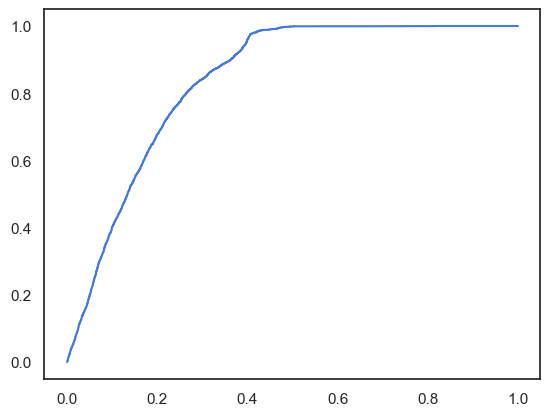

In [34]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [35]:
params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [36]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [37]:
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [38]:
grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [39]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836339,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.836337,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.836337,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.836337,3


In [40]:
# read the submission file
# predict with the last model
#upload into the Analytic Vidya website

sub = pd.read_csv('../Data/sample.csv')
sub.head(3)

,id,Response
0,381110,0
1,381111,0
2,381112,0


In [41]:
test.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


In [42]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [43]:
sub['Response'] = model_pipeline.predict(test)

In [44]:
sub.to_csv('../Data/submission.csv',index=False)

In [45]:
sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [46]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
over_sampling = RandomOverSampler()

In [49]:
train_y.value_counts()

Response
0           301071
1            41927
Name: count, dtype: int64

In [50]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [51]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [52]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]


In [53]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [54]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [57]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(str...
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=5)],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [58]:
grid_2.best_params_

{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}

In [60]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [61]:
grid_2.cv_results_

{'mean_fit_time': array([2.42544138, 2.44142997, 2.41863084, 2.42435145, 2.41762424,
        2.90409589]),
 'std_fit_time': array([0.02534091, 0.02352607, 0.01665449, 0.01796484, 0.01692867,
        0.01366782]),
 'mean_score_time': array([0.92049384, 0.91674256, 0.93814266, 0.93490911, 0.85926795,
        0.88211751]),
 'std_score_time': array([0.0114634 , 0.01104498, 0.03080666, 0.01359534, 0.009763  ,
        0.0204525 ]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(max_depth=5),
                    DecisionTreeClassifier(max_depth=5)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_model__pena

Train AUC
0.791279027345952
Valid AUC
0.7955030488340398
Train cnf_matrix
[[202499  98572]
 [  3775  38152]]
Valid cnf_matrix
[[22540 10788]
 [  408  4375]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.79      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111



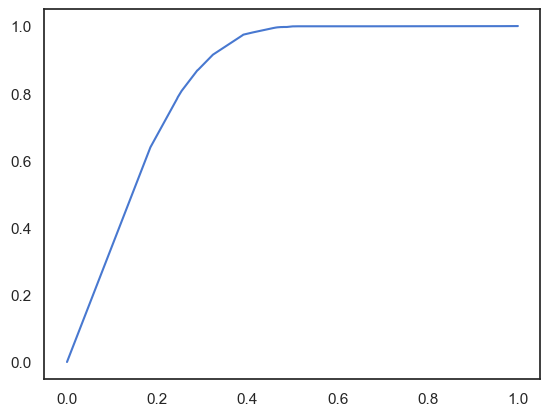

In [62]:
new_model = grid_2.best_estimator_
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.7917252076752659
Valid AUC
0.7955030488340398
Train cnf_matrix
[[202499  98572]
 [ 26839 274232]]
Valid cnf_matrix
[[22540 10788]
 [  408  4375]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      0.67      0.76    301071
           1       0.74      0.91      0.81    301071

    accuracy                           0.79    602142
   macro avg       0.81      0.79      0.79    602142
weighted avg       0.81      0.79      0.79    602142

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111



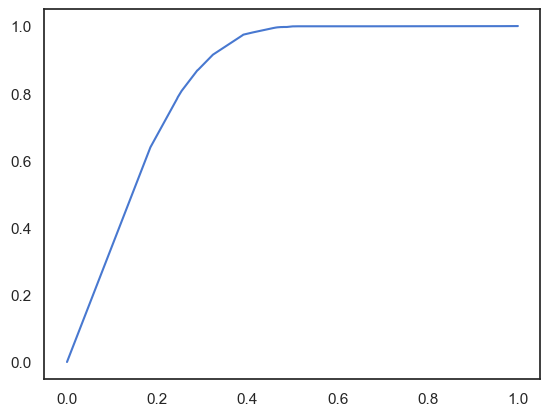

In [63]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

In [64]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836425,2
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836424,4
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836424,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836424,4
4,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 3}",0.817076,6
5,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}",0.837980,1


In [66]:
sub['Response'] = new_model.predict(test)
sub.to_csv('../Data/Predictionsub_2.csv',index=False)